## Feature Engineering and Polynomial Regression

Implementing feature engineering and polynomial regression which allows us to use the machinery of linear regression to fit very complex, even non linear functions.

In [2]:
# Importing the dependencies
import numpy as np  # For scientific computation
import matplotlib.pyplot as plt  # For plotting data
from utils import zscore_normalize_features, run_gradient_descent_feng

In real world scenarios, the data is often non linear, fitting a linear function to this data will definitely result in an inaccuarte model [high cost]. In such cases, we need to use the machinery of linear regression to fit a non linear function to this data. Since, the only machinery we are exposed to is by adjusting the parameters w and b to adjust the model. However, no ammount of modification to the values of parameters will fit a non linear curve to the data. 

Thus, to fit a non linear curve, we need to engineer new features from the existing ones. These new ones could either be combination of exisiting ones or a whole new ones derived from the existing ones.

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.69806954], b: -52.0834


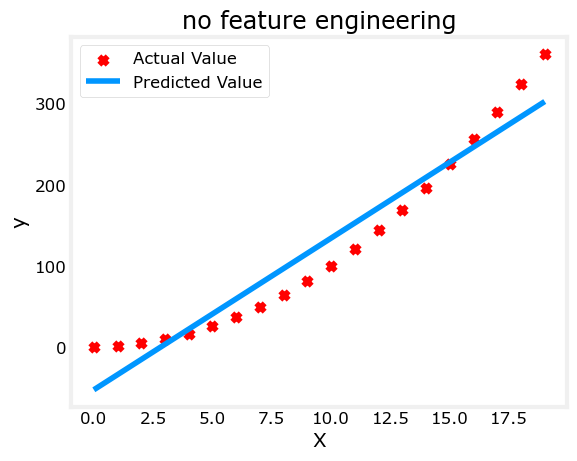

In [4]:
# Exploring polynomial regression that fits a non linear curve to the training data
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Above, we could clearly see that a linear function will do no justice to the training data. We need to fit a polynomial function which will likely be a better choice is this scenario 

In [5]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.00417494], b: 0.0490


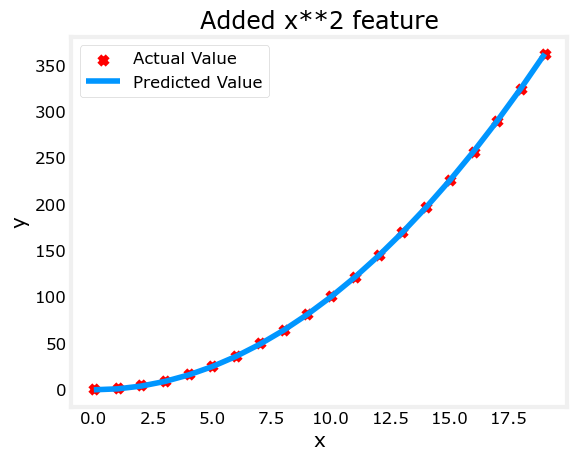

In [6]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

As expected, the polynomial function is much better fit to the training data. The way we did this is by engineering a new polynomial feature from the existing input features. 

## Selecting Features

It was obvious in the above example which feature is to be engineered to fit a polynomial function to the training data. However, it may not always be very obvious on which features to engineer to achieve a better fit. The bare minimum we could do is to try a couple of features and evaluate the best fit to the training data

In [7]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


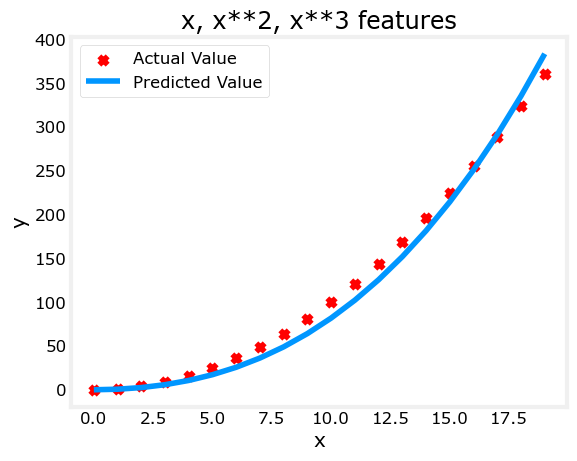

In [8]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Above, clearly seen the polynomial function is not the best fit unlike before. Here, we engineered some new features to evaluate the fit. The thing to note here is, the gradient descent has emphasized the data that is the best fit to the x2 data by increasing the  w1 term relative to the others. If we were to run for a very long time, it would continue to reduce the impact of the other terms. This means that Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter.

Less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data. Above, after fitting, the weight associated with the x2 feature is much larger than the weights for x or x3
as it is the most useful in fitting the data.

Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target.

In [9]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

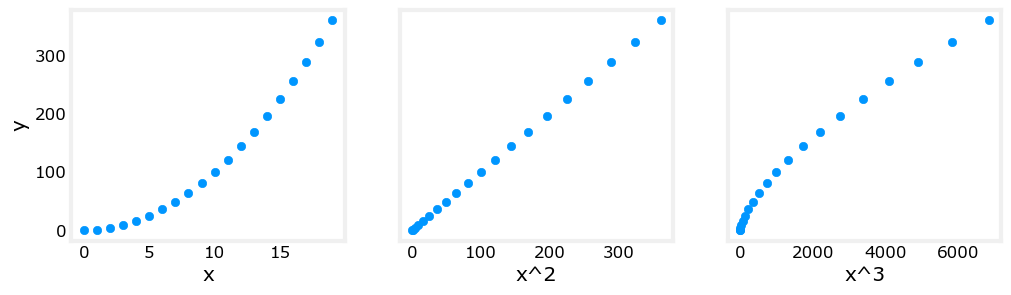

In [10]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Above, it is clear that the  𝑥2 feature mapped against the target value y is linear. Linear regression can then easily generate a model using that feature.

## Scaling Features

When we engineer new features, it is more likely that the range across the features will differ way more. In such cases, it is important to scale the features to speed up gradient descent. 

In the example above, there is x, x2 and x3 which will naturally have very different scales. We need to apply Z-score normalization to our example.

In [11]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238779e-05], b: 123.5000


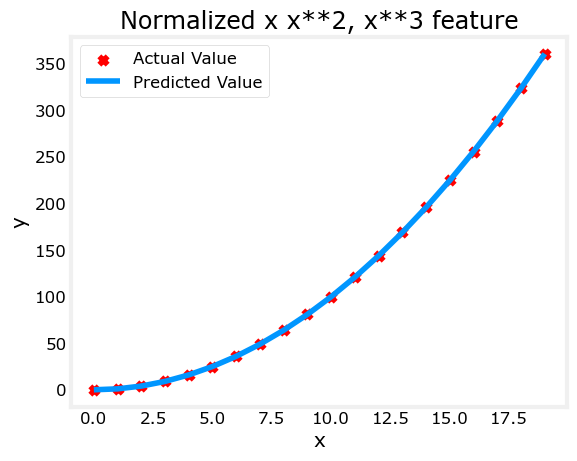

In [12]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Feature scaling allows this to converge much faster. The values of w, the w1 term, which is the x2 term is the most emphasized. Gradient descent has all but eliminated the x3 term.

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


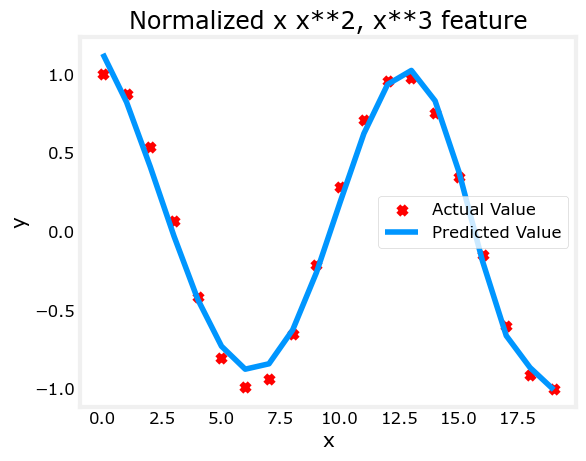

In [13]:
# With feature engineering, even quite complex functions can be modeled
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


Just to note that, feature scaling becomes way more important with feature engineering.